In [ ]:
using CairoMakie;
using Random, Distributions, Statistics, DelimitedFiles, StatsBase, LazySets, Glob;
using Distributed

include("tools/3spec_library.jl");
include("tools/preview_diffusivity.jl");

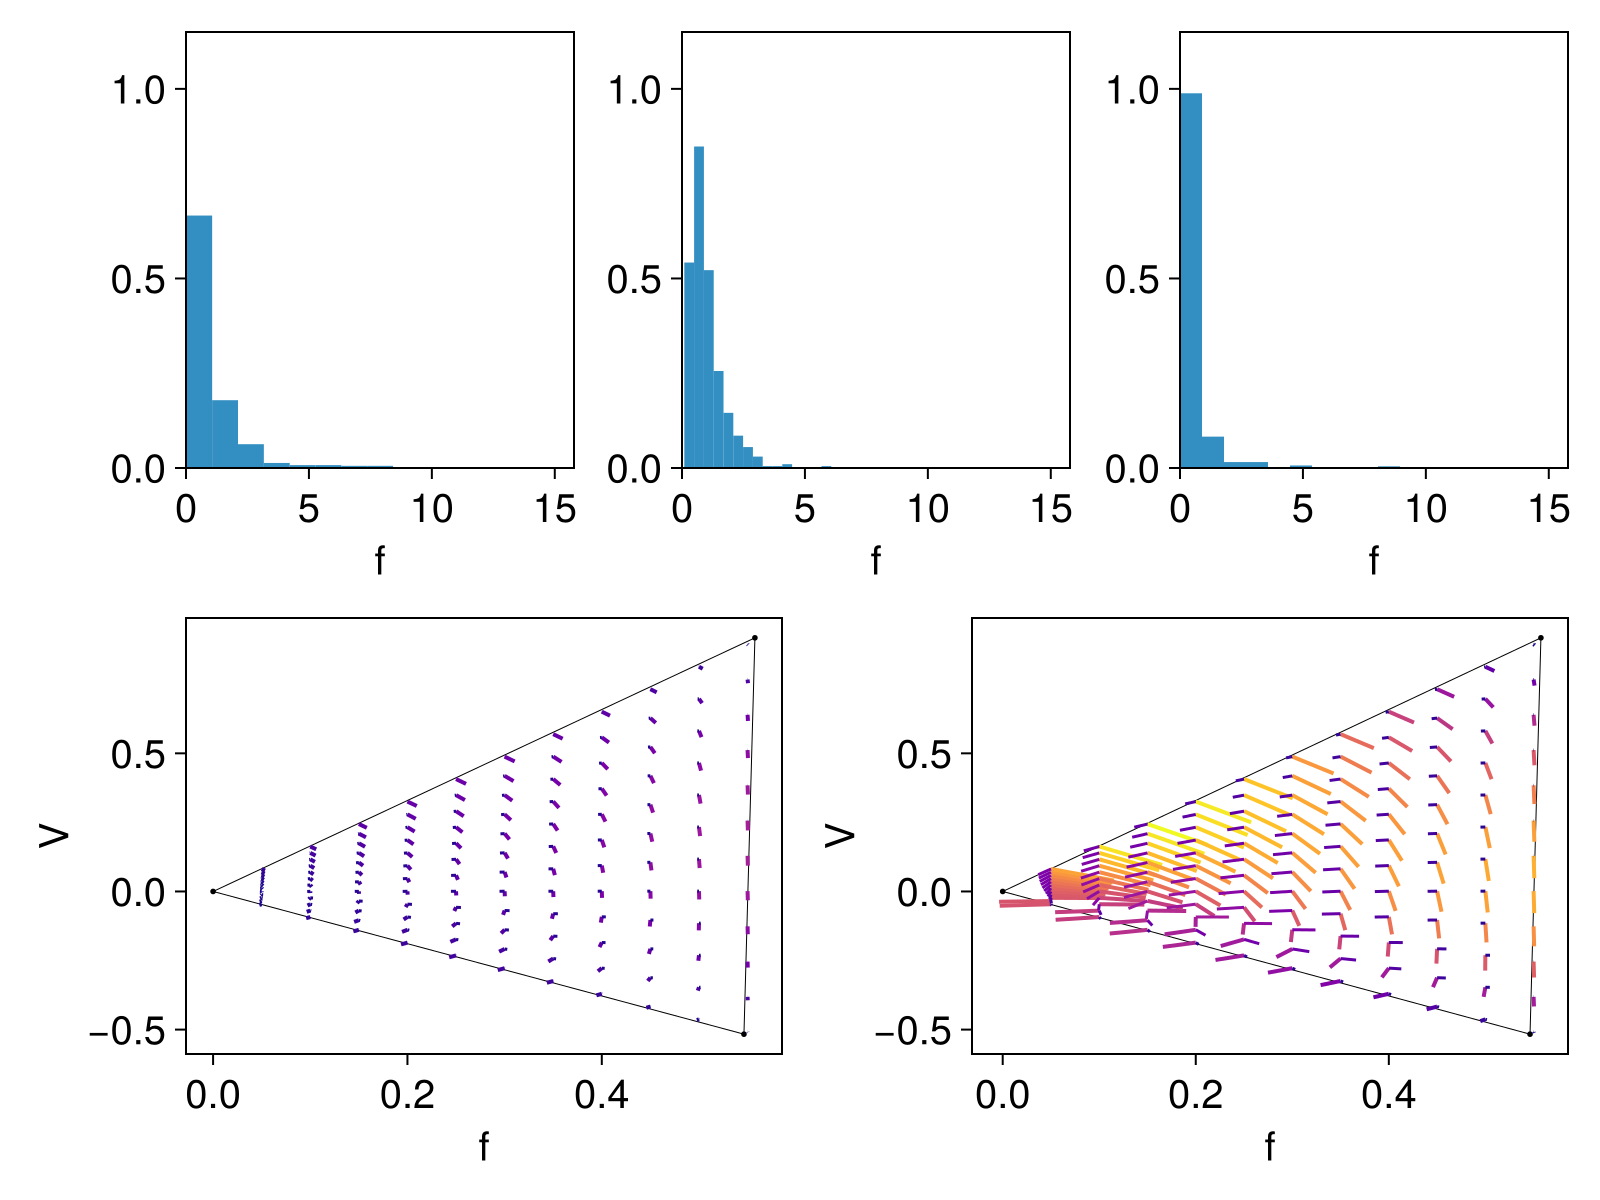

In [9]:
M = 500;
nu = 0.01;

fc = 0.5;
fb = 1.;
fa = 1.;
Vc = 1.5;
Vb = 0.5;
Va = 2.;

init_cond="balanced"

ncopies = 50
save_after = 0
save_every = 20
nsteps = 5000

gen_new = false
fa_read = "fa1.0*"
if gen_new
    land_vec = copy(get_landvec(M,fa,fb,fc,Va,Vb,Vc));
else
    # load the landscape
    listdir = glob("data/*"*fa_read)
    land_vec = readdlm(pwd()*"/"*listdir[1]*"/landvec.txt")
end
# plot the landscapes
fig = plot_land(land_vec)

fig

In [ ]:
function main_wrapper(set::Settings,evoset::EvoSettings,init_cond::String,dir::String)
    pop_ini, pop_ref_ini = initialize_pop(set,init_cond);   
    println("initialized")
    @distributed for n in 1:evoset.ncopies 
        main_evolve(n,set,evoset,pop_ini,pop_ref_ini,init_cond,dir) 
    end
    return
end;

for N in [10,20,50,100,200,500,1000]
    set  = Settings(N,1,M,transpose(land_vec))
    evoset = EvoSettings(nu,nsteps,ncopies,save_every,save_after)

    #save the landscapes
    dir = setup_outdir(set,evoset)

    main_wrapper(set,evoset,init_cond,dir)
end